In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("processed_police_incidents.csv")

/var/folders/7n/0yygb3f164jdsgdlskgrx7dr0000gn/T/ipykernel_1267/1266743285.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("processed_police_incidents.csv")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122604 entries, 0 to 1122603
Data columns (total 89 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   Incident Number w/year                     1122604 non-null  object 
 1   Year of Incident                           1122604 non-null  int64  
 2   Service Number ID                          1122604 non-null  object 
 3   Watch                                      1122604 non-null  object 
 4   Call (911) Problem                         1052551 non-null  object 
 5   Type of Incident                           1122604 non-null  object 
 6   Type  Location                             1121358 non-null  object 
 7   Type of Property                           228437 non-null   object 
 8   Incident Address                           1122596 non-null  object 
 9   Apartment Number                           256095 non-null   object 

In [4]:
data.describe()

,Year of Incident,Reporting Area,Beat,Sector,Year1 of Occurrence,Day1 of the Year,Year2 of Occurrence,Day2 of the Year,Offense Entered Year,Offense Entered Date/Time,Criminal Justice Information Service Code,UCR Code,X Coordinate,Y Cordinate,Zip Code,Incident_Score
count,1.122604e+06,1.122448e+06,1.122604e+06,1.122604e+06,1.122604e+06,1.122604e+06,1.122580e+06,1.122580e+06,1.122604e+06,1.122604e+06,1.122285e+06,404281.000000,1.122588e+06,1.122588e+06,1.122604e+06,1.122604e+06
mean,2.018990e+03,3.143825e+03,4.135399e+02,4.096263e+02,2.018927e+03,1.847024e+02,2.018938e+03,1.846757e+02,2.018948e+03,1.844270e+02,4.802772e+07,1399.604782,2.494042e+06,6.978933e+06,7.522442e+04,4.879219e+01
std,1.591511e+01,1.830237e+03,1.972888e+02,1.973639e+02,2.667191e+00,1.024933e+02,2.661840e+00,1.024495e+02,2.659461e+00,1.024275e+02,3.423537e+07,1219.253461,2.176435e+04,3.116737e+04,1.716168e+02,2.187516e+01
min,1.011000e+03,1.001000e+03,1.110000e+02,1.100000e+02,1.974000e+03,1.000000e+00,1.900000e+03,1.000000e+00,2.014000e+03,1.000000e+00,7.391108e+06,110.000000,2.415424e+06,6.895309e+06,0.000000e+00,0.000000e+00
25%,2.017000e+03,1.247000e+03,2.350000e+02,2.300000e+02,2.017000e+03,9.900000e+01,2.017000e+03,9.900000e+01,2.017000e+03,9.900000e+01,2.299001e+07,640.000000,2.478416e+06,6.956215e+06,7.521200e+04,3.000000e+01
50%,2.019000e+03,3.059000e+03,4.210000e+02,4.200000e+02,2.019000e+03,1.870000e+02,2.019000e+03,1.870000e+02,2.019000e+03,1.870000e+02,2.411000e+07,710.000000,2.492758e+06,6.976566e+06,7.522400e+04,5.500000e+01
75%,2.021000e+03,4.321000e+03,5.520000e+02,5.500000e+02,2.021000e+03,2.700000e+02,2.021000e+03,2.700000e+02,2.021000e+03,2.690000e+02,1.000000e+08,1800.000000,2.506241e+06,7.001896e+06,7.523600e+04,6.500000e+01
max,9.578000e+03,9.612000e+03,7.570000e+02,7.500000e+02,2.023000e+03,3.660000e+02,2.023000e+03,3.660000e+02,2.023000e+03,3.660000e+02,1.000000e+08,5700.000000,2.590586e+06,7.100758e+06,9.800400e+04,9.500000e+01


In [5]:
print(data.isna().sum())

Incident Number w/year        0
Year of Incident              0
Service Number ID             0
Watch                         0
Call (911) Problem        70053
                          ...  
State                     13430
Location1                     0
Incident_Score                0
Time Bin                      0
Safety Score                  0
Length: 89, dtype: int64


In [6]:
features = ['Day1 of the Week', 'Time Bin' , 'Zip Code', 'Sector', 'Division', 'X Coordinate', 'Y Cordinate', 'Council District', 'Type  Location']
label = ['Incident_Score']

In [7]:
data_filter = data[features + label]

In [8]:
print(data_filter.isna().sum())

Day1 of the Week       0
Time Bin               0
Zip Code               0
Sector                 0
Division               0
X Coordinate          16
Y Cordinate           16
Council District     539
Type  Location      1246
Incident_Score         0
dtype: int64


In [9]:
print(data_filter.shape)
data_filter = data_filter.dropna()
print(data_filter.shape)

(1122604, 10)
(1120819, 10)


In [10]:
X = data_filter[features]
Y = data_filter[label]

In [11]:
print("feature info: \n", X.info())
print()
print("label info: \n", Y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1120819 entries, 0 to 1122603
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Day1 of the Week  1120819 non-null  object 
 1   Time Bin          1120819 non-null  object 
 2   Zip Code          1120819 non-null  float64
 3   Sector            1120819 non-null  float64
 4   Division          1120819 non-null  object 
 5   X Coordinate      1120819 non-null  float64
 6   Y Cordinate       1120819 non-null  float64
 7   Council District  1120819 non-null  object 
 8   Type  Location    1120819 non-null  object 
dtypes: float64(4), object(5)
memory usage: 85.5+ MB
feature info: 
 None

<class 'pandas.core.frame.DataFrame'>
Index: 1120819 entries, 0 to 1122603
Data columns (total 1 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Incident_Score  1120819 non-null  float64
dtypes: float64(1)
memory usage

In [12]:
print(X.isna().sum())
print()
print(Y.isna().sum())

Day1 of the Week    0
Time Bin            0
Zip Code            0
Sector              0
Division            0
X Coordinate        0
Y Cordinate         0
Council District    0
Type  Location      0
dtype: int64

Incident_Score    0
dtype: int64


In [13]:
X.describe(include=object)

,Day1 of the Week,Time Bin,Division,Council District,Type Location
count,1120819,1120819,1120819,1120819,1120819
unique,7,4,7,18,73
top,Fri,Night,NORTHEAST,D6,"Highway, Street, Alley ETC"
freq,170922,360306,185080,130861,202060


In [14]:
label_encoder = LabelEncoder()

for column in X.columns:
    if X[column].dtype == 'object':
        # Encode only the 'object' type columns
        X[column] = label_encoder.fit_transform(X[column])

/var/folders/7n/0yygb3f164jdsgdlskgrx7dr0000gn/T/ipykernel_1267/1745384231.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
/var/folders/7n/0yygb3f164jdsgdlskgrx7dr0000gn/T/ipykernel_1267/1745384231.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
/var/folders/7n/0yygb3f164jdsgdlskgrx7dr0000gn/T/ipykernel_1267/1745384231.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [30]:
avg_inc_score_by_day = data_filter.groupby('Day1 of the Week')['Incident_Score'].agg(['mean'])
print(avg_inc_score_by_day)

                       mean
Day1 of the Week           
Fri               49.066241
Mon               48.700730
Sat               48.578904
Sun               48.622723
Thu               48.751037
Tue               48.839702
Wed               49.082301


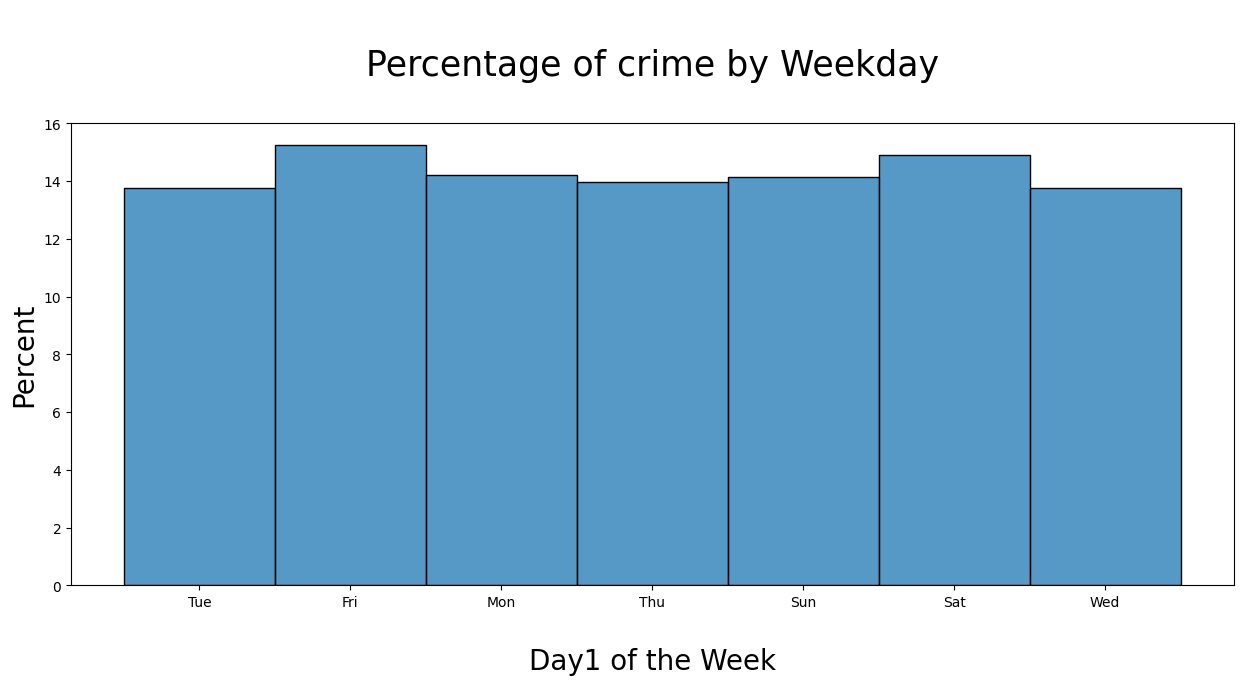

In [103]:
plt.subplots(figsize=(15, 6))
s = sns.histplot(data=data['Day1 of the Week'], stat='percent')
#plt.title('Percentage of crime by Weekday')
s.axes.set_title('\nPercentage of crime by Weekday\n',fontsize=25)
s.set_ylabel("Percent",fontsize=20)
s.set_xlabel("\nDay1 of the Week",fontsize=20)
plt.savefig('./img/Percentage_of_crime_by_Weekday.png')

plt.show()

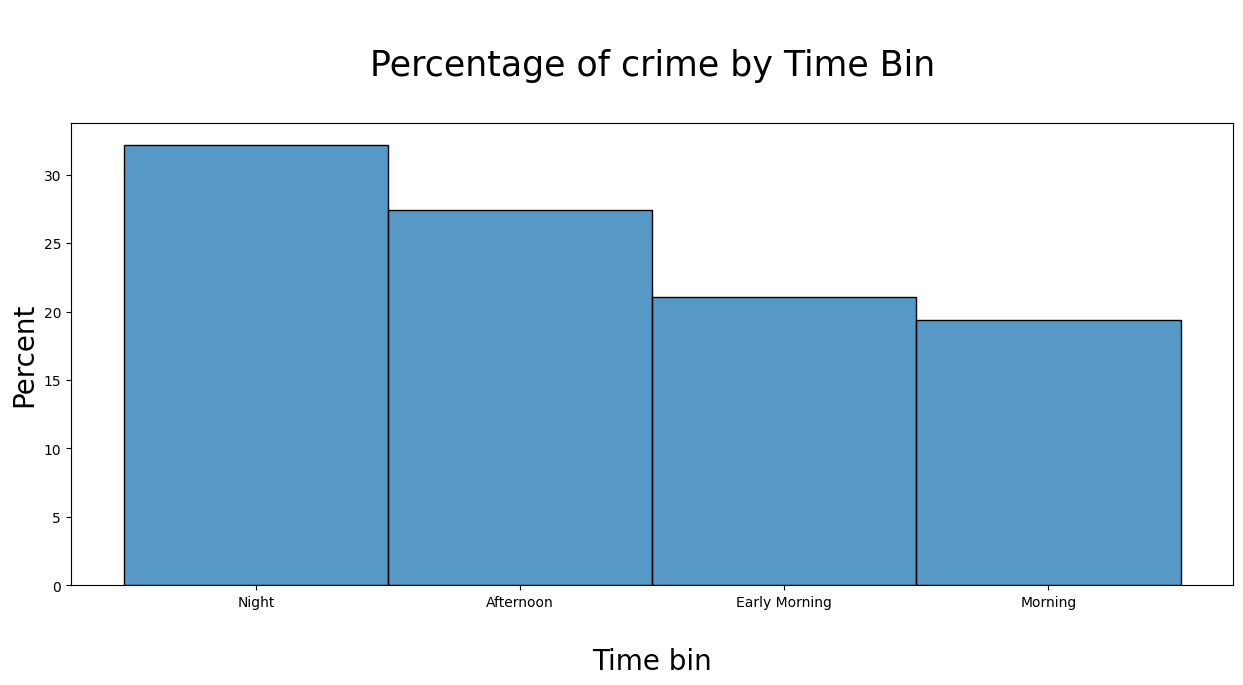

In [104]:
plt.subplots(figsize=(15, 6))
s = sns.histplot(data=data['Time Bin'], stat='percent')
s.axes.set_title('\nPercentage of crime by Time Bin\n',fontsize=25)
s.set_ylabel("Percent",fontsize=20)
s.set_xlabel("\nTime bin",fontsize=20)
plt.savefig('./img/Percentage_of_crime_by_Time_Bin.png')

plt.show()

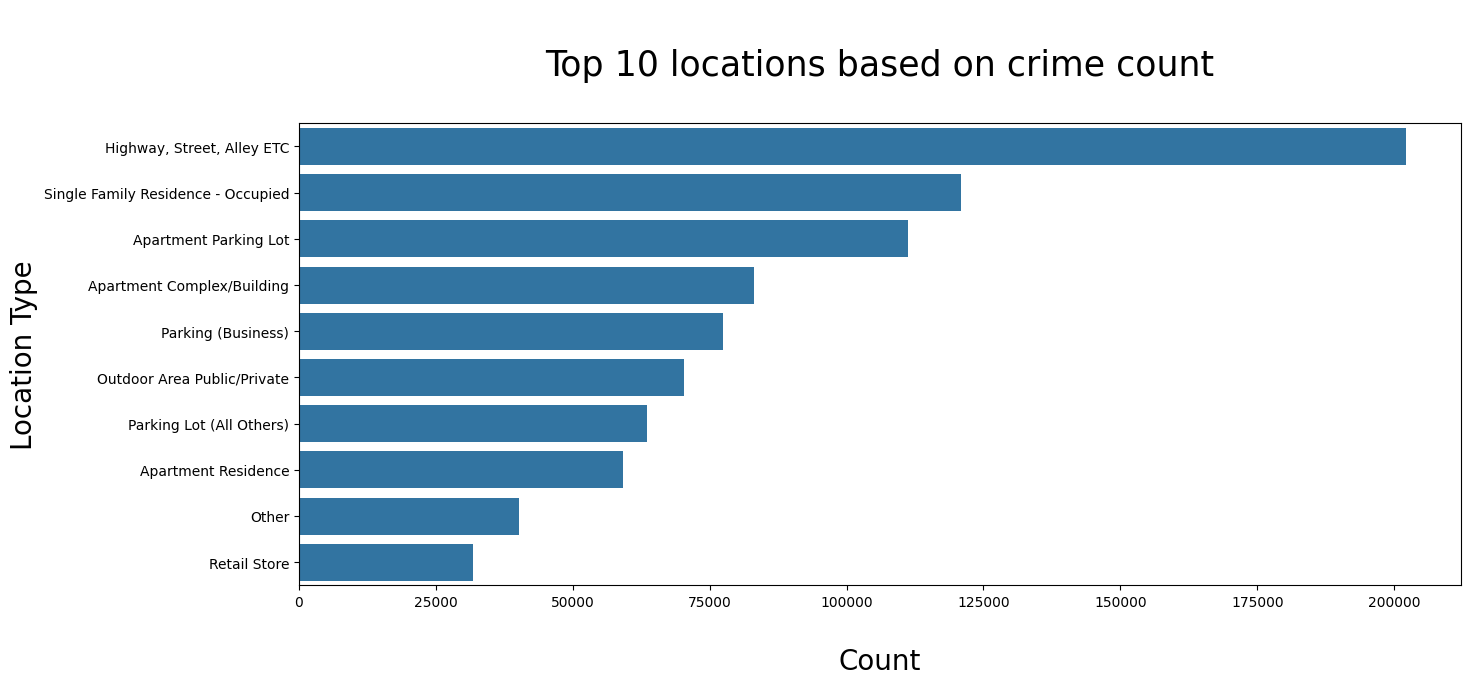

In [105]:
top_10_locations = data['Type  Location'].value_counts().head(10)

plt.subplots(figsize=(15, 6))
s = sns.barplot(x=top_10_locations.values, y=top_10_locations.index)
s.axes.set_title('\nTop 10 locations based on crime count\n',fontsize=25)
s.set_ylabel("Location Type",fontsize=20)
s.set_xlabel("\nCount",fontsize=20)
plt.savefig('./img/Top_10_locations_based_on_crime_count.png')

plt.show()

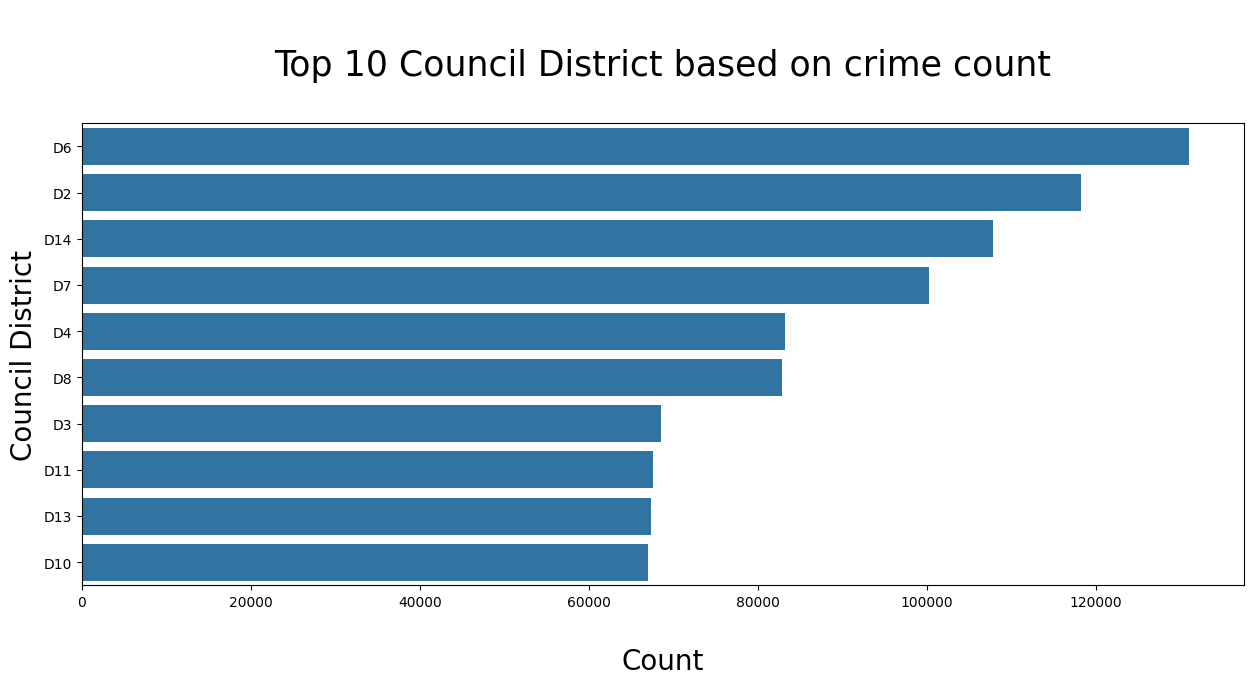

In [106]:
top_10_council_districts = data['Council District'].value_counts().head(10)

plt.subplots(figsize=(15, 6))
s = sns.barplot(x=top_10_council_districts.values, y=top_10_council_districts.index)
s.axes.set_title('\nTop 10 Council District based on crime count\n',fontsize=25)
s.set_ylabel("Council District",fontsize=20)
s.set_xlabel("\nCount",fontsize=20)
plt.savefig('./img/Top_10_Council_District_based_on_crime_count.png')

plt.show()

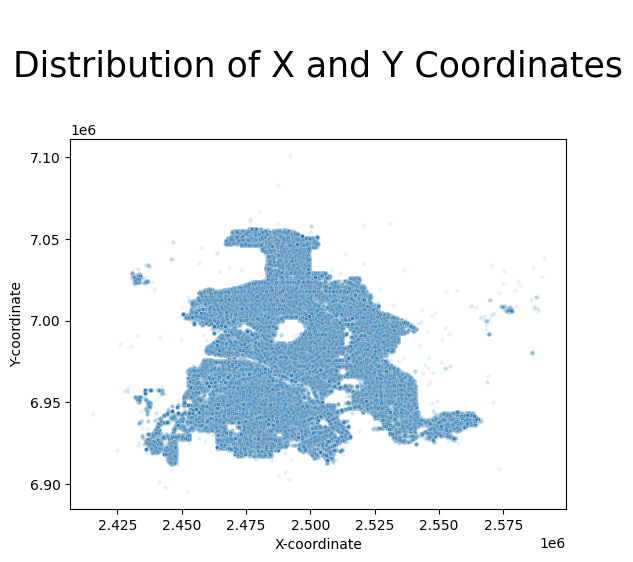

In [107]:
s = sns.scatterplot(data=data, x='X Coordinate', y='Y Cordinate', alpha=0.1, marker='.')

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
#plt.title('Distribution of X and Y Coordinates')
s.axes.set_title('\nDistribution of X and Y Coordinates\n',fontsize=25)
plt.savefig('./img/Distribution_of_X_and_Y_Coordinates.png')

plt.show()

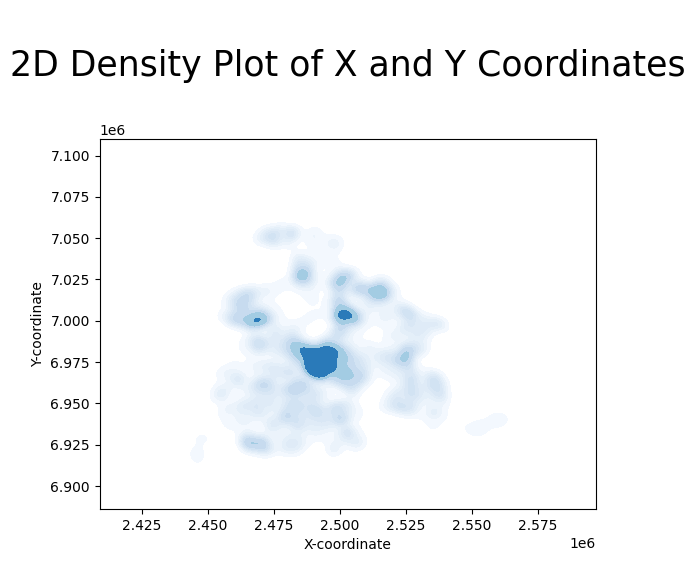

In [108]:
s = sns.kdeplot(data=data, x='X Coordinate', y='Y Cordinate', fill=True, cmap='Blues', levels=10)

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
#plt.title('2D Density Plot of X and Y Coordinates')
s.axes.set_title('\n2D Density Plot of X and Y Coordinates\n',fontsize=25)
plt.savefig('./img/2D_Density_Plot_of_X_and_Y_Coordinates.png')

# Display the plot
plt.show()

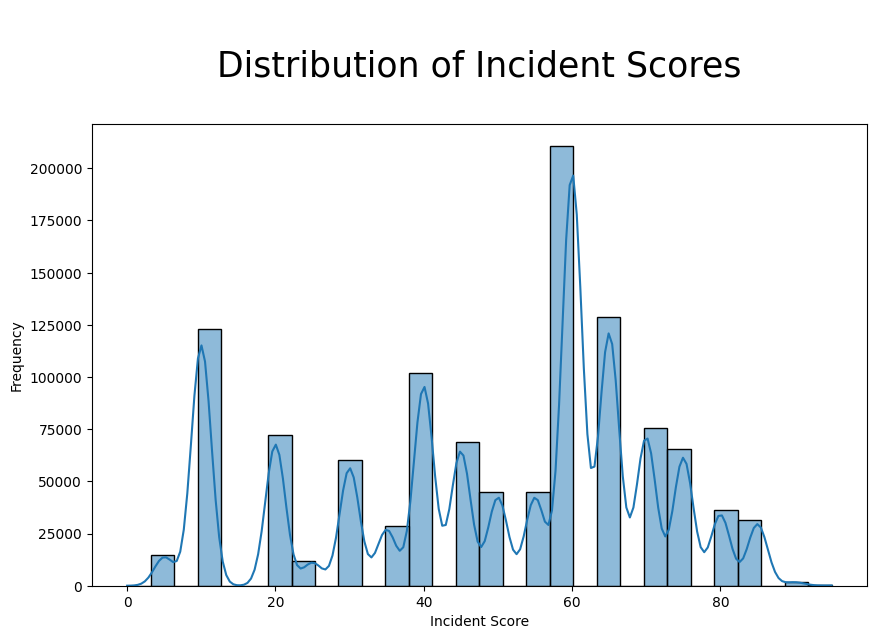

In [109]:
# Distribution of Incident Scores
plt.figure(figsize=(10, 6))
s = sns.histplot(data=Y, x='Incident_Score', bins=30, kde=True)
# plt.title('Distribution of Incident Scores')
s.axes.set_title('\nDistribution of Incident Scores\n',fontsize=25)
plt.xlabel('Incident Score')
plt.ylabel('Frequency')
plt.savefig('./img/Distribution_of_Incident_Scores.png')
plt.show()

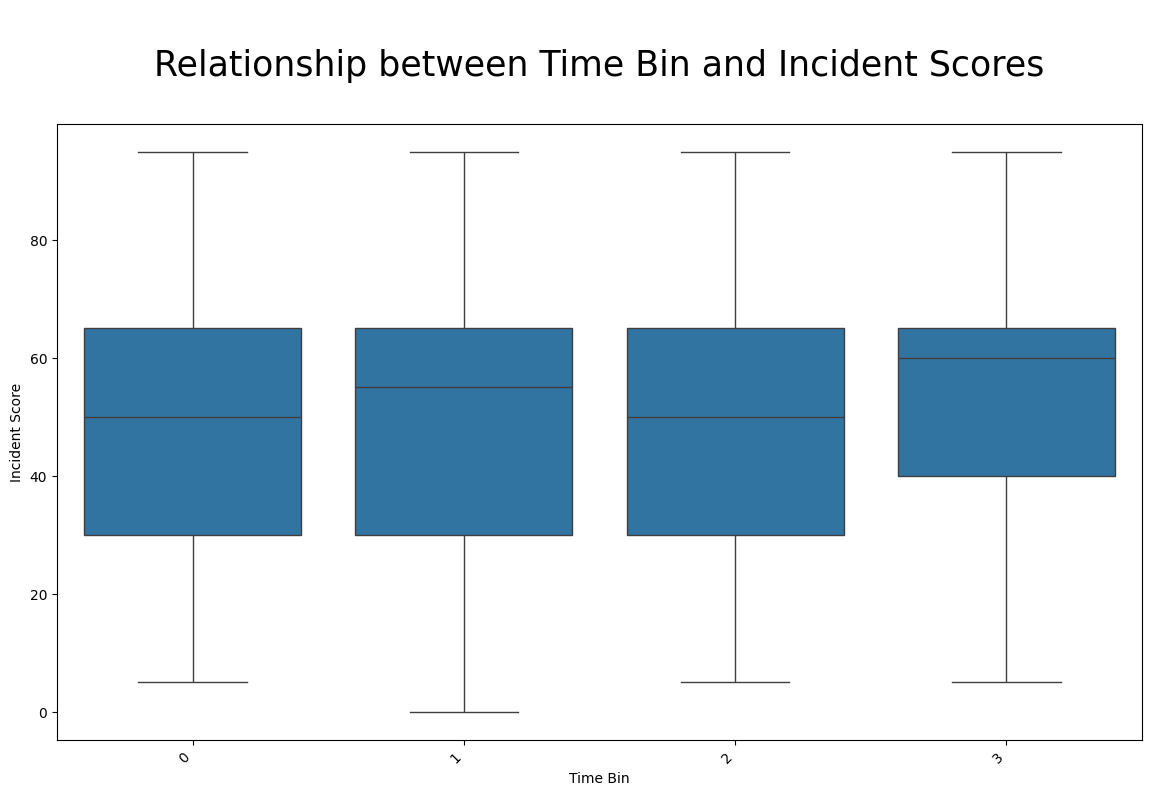

In [110]:
# Relationship between Time Bin and Incident Scores
df_crime = pd.concat([X, Y], axis=1)
plt.figure(figsize=(14, 8))
s = sns.boxplot(data=df_crime, x='Time Bin', y='Incident_Score')
# plt.title('Relationship between Time Bin and Incident Scores')
s.axes.set_title('\nRelationship between Time Bin and Incident Scores\n',fontsize=25)
plt.xlabel('Time Bin')
plt.ylabel('Incident Score')
plt.xticks(rotation=45, ha='right')
plt.savefig('./img/Relationship_between_Time_Bin_and_Incident_Scores.png')

plt.show()

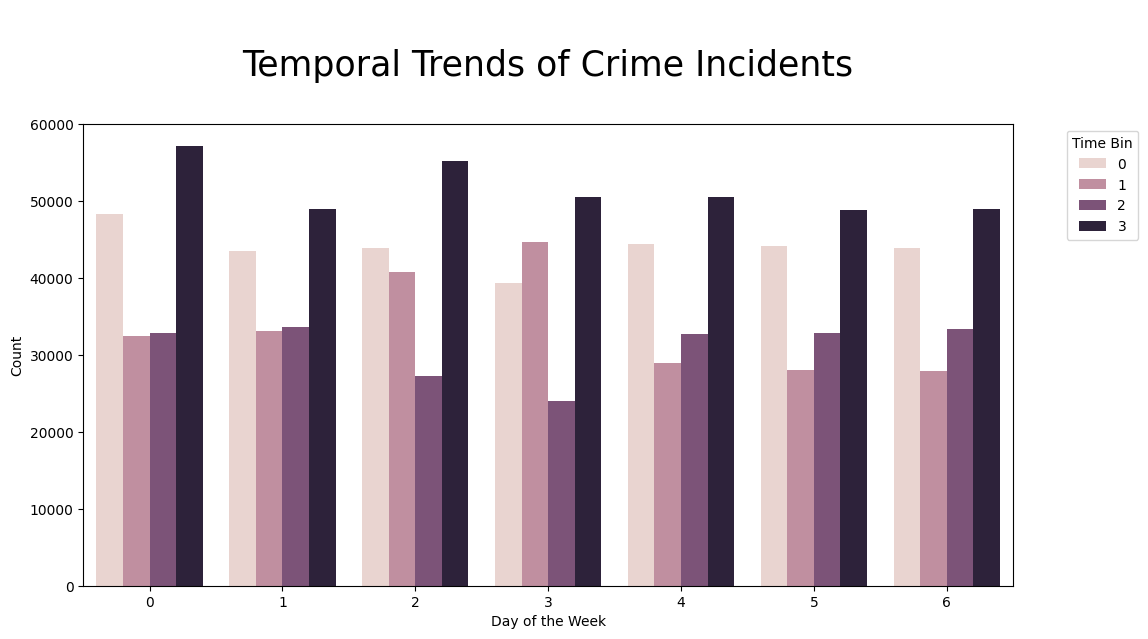

In [111]:
plt.figure(figsize=(12, 6))
s = sns.countplot(data=df_crime, x='Day1 of the Week', hue='Time Bin')
# plt.title('Temporal Trends of Crime Incidents')
s.axes.set_title('\nTemporal Trends of Crime Incidents\n',fontsize=25)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Time Bin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./img/Temporal_Trends_of_Crime_Incidents.png')
plt.show()


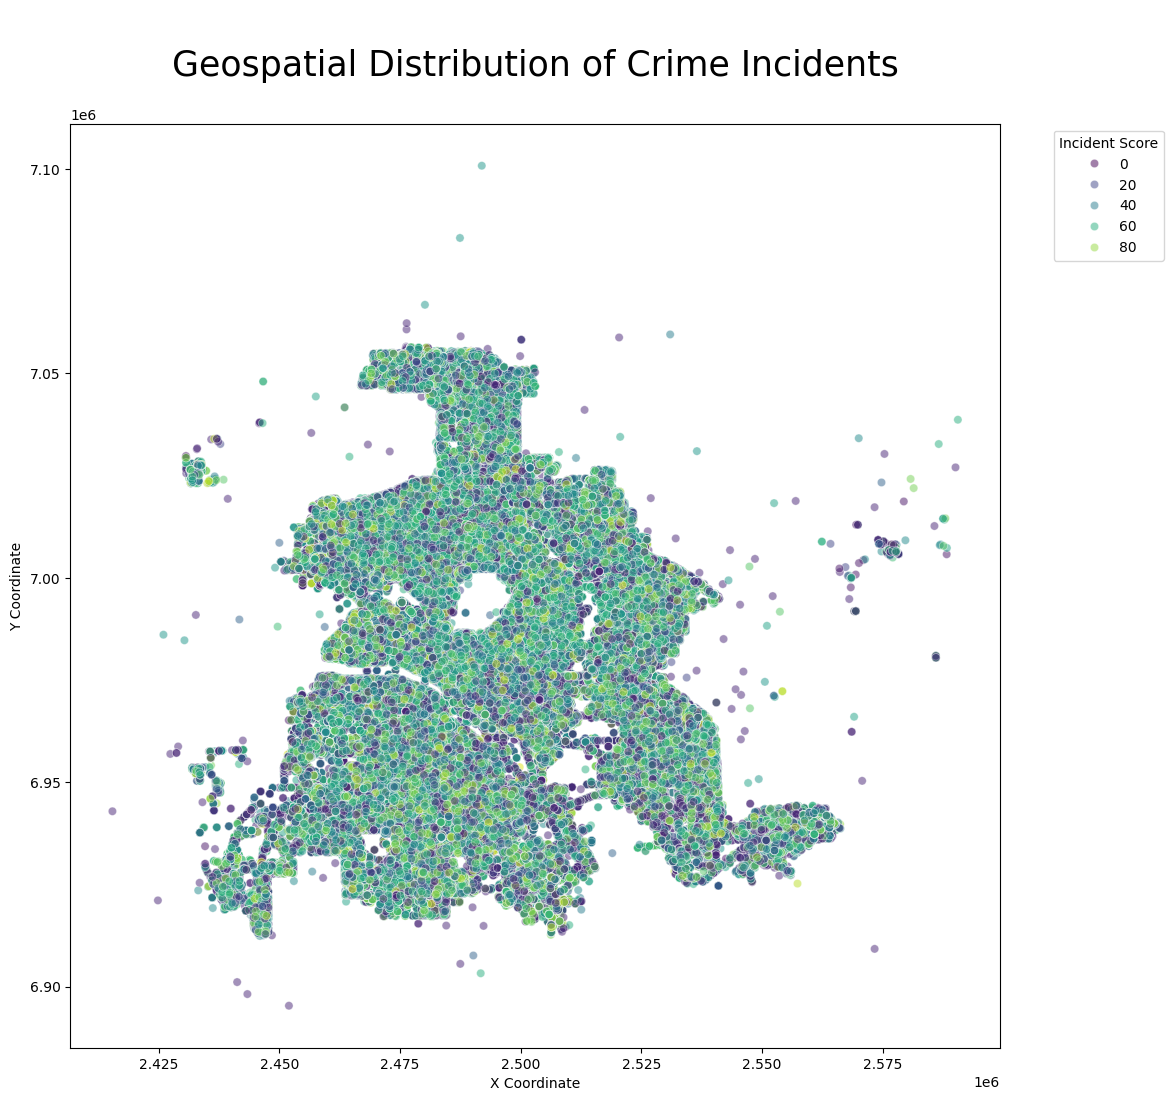

In [112]:
# Geospatial Distribution of Crime Incidents
plt.figure(figsize=(12, 12))
s = sns.scatterplot(data=df_crime, x='X Coordinate', y='Y Cordinate', hue='Incident_Score', palette='viridis', alpha=0.5)
# plt.title('Geospatial Distribution of Crime Incidents')
s.axes.set_title('\nGeospatial Distribution of Crime Incidents\n',fontsize=25)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(title='Incident Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./img/Geospatial_Distribution_of_Crime_Incidents.png')

plt.show()

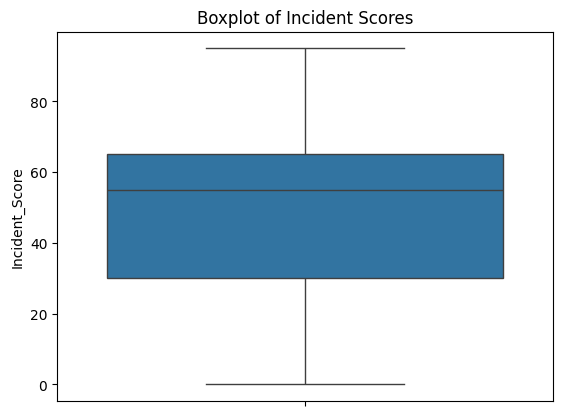

count    1.120819e+06
mean     4.880590e+01
std      2.186286e+01
min      0.000000e+00
25%      3.000000e+01
50%      5.500000e+01
75%      6.500000e+01
max      9.500000e+01
Name: Incident_Score, dtype: float64


<Figure size 640x480 with 0 Axes>

In [113]:
sns.boxplot(data=data, y='Incident_Score')
plt.title('Boxplot of Incident Scores')
plt.show()
plt.savefig('./img/Boxplot_of_Incident_Scores.png')

print(Y['Incident_Score'].describe())


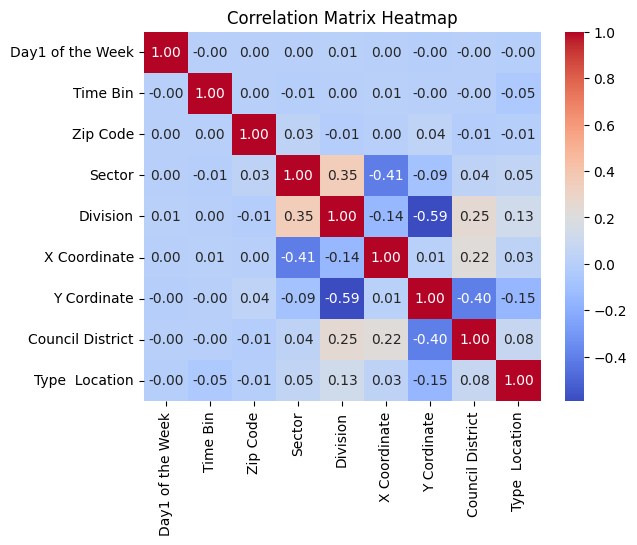

In [114]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.savefig('./img/Correlation_Matrix_Heatmap.png')

plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [46]:
print('Train data: ', X_train.shape, y_train.shape)
print('Test data: ', X_test.shape, y_test.shape)

Train data:  (896655, 9) (896655, 1)
Test data:  (224164, 9) (224164, 1)


In [55]:
dtree = DecisionTreeRegressor()
model = dtree.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

-0.4220490809292461

In [56]:
print('feature_importances_', model.feature_importances_)
print('max_features_', model.max_features_)
print('n_features_in_', model.n_features_in_)
print('feature_names_in_', model.feature_names_in_)
print('n_outputs_', model.n_outputs_)

feature_importances_ [0.16170926 0.02438067 0.02173898 0.01805347 0.00342426 0.34041378
 0.34034542 0.01105407 0.07888009]
max_features_ 9
n_features_in_ 9
feature_names_in_ ['Day1 of the Week' 'Time Bin' 'Zip Code' 'Sector' 'Division'
 'X Coordinate' 'Y Cordinate' 'Council District' 'Type  Location']
n_outputs_ 1


In [57]:
# Evaluate the model for train
trmae = mean_absolute_error(y_train, y_train_pred)
trmse = mean_squared_error(y_train, y_train_pred)
trrmse = np.sqrt(trmse)
trr2 = r2_score(y_train, y_train_pred)

# Print
print('mae: ', trmae)
print('mse: ', trmse)
print('rmse: ', trrmse)
print('r2: ', r2)

mae:  3.332449304538784
mse:  64.98106904951317
rmse:  8.061083615092524
r2:  -0.42127850212182216


In [58]:
# Evaluate the model for test
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print
print('mae: ', mae)
print('mse: ', mse)
print('rmse: ', rmse)
print('r2: ', r2)

mae:  18.40471473670957
mse:  680.5525832523841
rmse:  26.087402769390135
r2:  -0.4220490809292461
